In [76]:
from sklearn.metrics import accuracy_score
import pickle
import cv2
import numpy as np
from gcforest.gcforest import GCForest
from gcforest.utils.config_utils import load_json
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

#red = 0
#yellow = 1
#green = 2

In [94]:
# load
imgs = ['data/for_real/green1.jpg', 'data/for_real/green2.png', 'data/for_real/green3.png', 'data/for_real/red1.png',
        'data/for_real/red2.png','data/for_real/yellow1.png','data/for_real/yellow2.png']
labels = np.array([2, 2, 2, 0, 0, 1, 1])

def prepare_trafficlight(image):
    image = cv2.cvtColor(cv2.imread(image), cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (24, 72))
    return image

In [95]:
imgs_preps = [prepare_trafficlight(i) for i in imgs]
imgs_preprocess = [np.divide(i, 255).astype (np.float32) for i in imgs_preps]
X_test = np.array(imgs_preprocess)
X_test.shape

(7, 72, 24, 3)

In [96]:
# load
with open("test.pkl", "rb") as f:
    gc = pickle.load(f)

[ 2018-02-20 20:28:07,621][cascade_classifier.transform] X_groups_test.shape=[(7, 72, 24, 3)]
[ 2018-02-20 20:28:07,622][cascade_classifier.transform] group_dims=[5184]
[ 2018-02-20 20:28:07,623][cascade_classifier.transform] X_test.shape=(7, 5184)
[ 2018-02-20 20:28:07,623][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(7, 5184)


[2 2 2 0 0 1 1]
Test Accuracy of GcForest = 100.00 %
--- 0.12 seconds ---


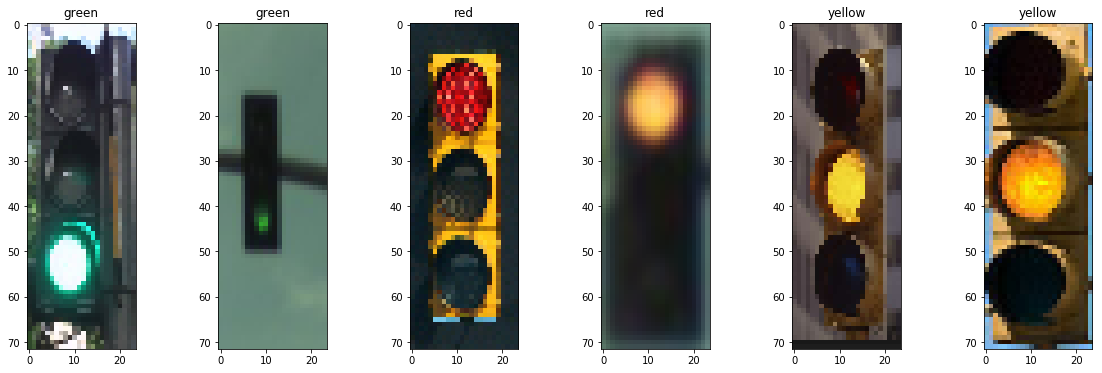

In [114]:
import time
start_time = time.time()
y_pred = gc.predict(X_test)
print(y_pred)
acc = accuracy_score(labels, y_pred)
print("Test Accuracy of GcForest = {:.2f} %".format(acc * 100))
print("--- {:.2f} seconds ---" .format(time.time() - start_time))
fig=plt.figure(figsize=(20, 6))
columns = 6
rows = 1
for i in range(1, columns*rows + 1):
    img = X_test[i]
    
    if y_pred[i] == 0: 
        lb = 'red' 
    elif y_pred[i] == 1: 
        lb = 'yellow' 
    else: lb='green'
    fig.add_subplot(rows, columns, i).set_title(lb)
    plt.imshow(img)
plt.show()    

In [99]:
y_pred

array([2, 2, 2, 0, 0, 1, 1], dtype=int64)

In [100]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

In [ ]:
img_prep = prepare_trafficlight(img1)
X_test_preprocessed = np.divide(img_prep, 255).astype (np.float32);
X_test = X_test_preprocessed[np.newaxis,:, :, :]
y_test_red = [2]